<a href="https://colab.research.google.com/github/SalsabilaAyuAnjelina/Data-Mining_Klasifikasi_Data_dengan_KNN/blob/main/kelulusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load Dataset

In [ ]:
df=pd.read_csv('dataset.csv',delimiter=';')
df

,jenis_kelamin,pekerjaan,status,ipk,lulus
0,laki,mhs,belum,3.17,tepat
1,laki,bekerja,belum,3.30,tepat
2,perempuan,mhs,belum,3.01,tepat
3,perempuan,mhs,menikah,3.25,tepat
4,laki,bekerja,menikah,3.20,terlambat
5,laki,bekerja,menikah,2.50,terlambat
6,perempuan,bekerja,menikah,3.00,terlambat
7,perempuan,bekerja,belum,2.70,terlambat
8,laki,bekerja,belum,2.40,terlambat
9,perempuan,mhs,menikah,2.50,terlambat


In [ ]:
x=df.drop(columns='lulus')
y=df.lulus

In [ ]:
x

,jenis_kelamin,pekerjaan,status,ipk
0,laki,mhs,belum,3.17
1,laki,bekerja,belum,3.30
2,perempuan,mhs,belum,3.01
3,perempuan,mhs,menikah,3.25
4,laki,bekerja,menikah,3.20
5,laki,bekerja,menikah,2.50
6,perempuan,bekerja,menikah,3.00
7,perempuan,bekerja,belum,2.70
8,laki,bekerja,belum,2.40
9,perempuan,mhs,menikah,2.50


In [ ]:
x_train,x_test,y_train,y_test= \
train_test_split(x,y, test_size=0.2, random_state=42)


In [ ]:
x,x_train

(   jenis_kelamin pekerjaan   status   ipk
 0           laki      mhs     belum  3.17
 1           laki   bekerja    belum  3.30
 2      perempuan      mhs     belum  3.01
 3      perempuan      mhs   menikah  3.25
 4           laki   bekerja  menikah  3.20
 5           laki   bekerja  menikah  2.50
 6      perempuan   bekerja  menikah  3.00
 7      perempuan   bekerja    belum  2.70
 8           laki   bekerja    belum  2.40
 9      perempuan      mhs   menikah  2.50
 10     perempuan      mhs     belum  2.50
 11     perempuan      mhs     belum  3.50
 12          laki   bekerja  menikah  3.30
 13          laki      mhs   menikah  3.25
 14          laki      mhs     belum  2.30,
    jenis_kelamin pekerjaan   status   ipk
 13          laki      mhs   menikah  3.25
 5           laki   bekerja  menikah  2.50
 8           laki   bekerja    belum  2.40
 2      perempuan      mhs     belum  3.01
 1           laki   bekerja    belum  3.30
 14          laki      mhs     belum  2.30
 4        

In [ ]:
x.shape,x_train.shape,y.shape,y_train.shape,x_test.shape,y_test.shape

((15, 4), (12, 4), (15,), (12,), (3, 4), (3,))

In [ ]:
from jcopml.pipeline import num_pipe, cat_pipe

In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.4 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=fb5500b86a03a4e5626afdb51562b0e3e24fdaa5f8a4231fecd286237e60ada5
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


# Persiapan Parameter Pengenalan Colom

In [ ]:
param=ColumnTransformer([
    ('numeric', num_pipe(),['ipk']),
    ('categoric', cat_pipe(encoder='onehot'),
    ['jenis_kelamin', 'pekerjaan','status'])
])

# Persiapan Algoritma Bayes dan Memasukan Parameter pengenalan kolom

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline=Pipeline([
    ('prep', param),
    ('algo',GaussianNB())
])

# Proses Training

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ipk']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['jenis_kelamin', 'pekerjaan',
                                                   'status'])])),
                ('algo', GaussianNB())])

# Lihat Performa Model

In [ ]:
pipeline.score(x_train,y_train), pipeline.score(x_test, y_test)

(0.9166666666666666, 1.0)

# Tracing Kesalahan Model

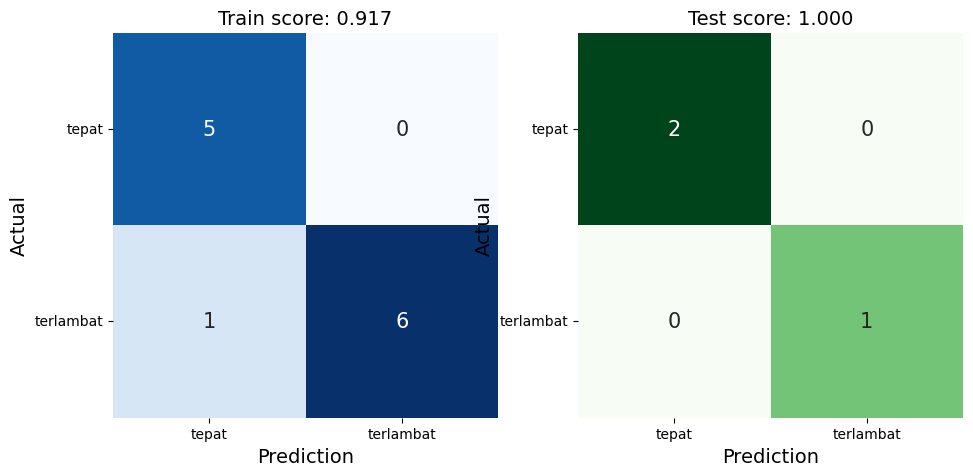

In [ ]:
from jcopml import plot
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train,y_train,x_test,y_test,pipeline)

# Tahap Prediksi / Ramalan

In [ ]:
data_uji=pd.read_csv('ujicoba.csv' ,delimiter=';')
data_uji

,jenis_kelamin,pekerjaan,status,ipk
0,laki,mhs,belum,2.7


In [ ]:
pipeline.predict(data_uji)

array(['terlambat'], dtype='<U9')

In [ ]:
data_uji['Prediksi-Lulus']=pipeline.predict(data_uji)
data_uji

,jenis_kelamin,pekerjaan,status,ipk,Prediksi-Lulus
0,laki,mhs,belum,2.7,terlambat
